## Detecting seizures on EEG - Milestone 4 &5

### CS 109A Data Science, Harvard University


**Hannah Bend, Sanjay Tiwari, Sathish Kumar, Yohann Smadja**

In [1]:
#!pip install pyedflib
#!pip install PyWavelets

import pyedflib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pywt
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
chb01_21_seisure_df = pd.read_csv('chb01_21_seisure.csv')
chb01_26_seisure_df = pd.read_csv('chb01_26_seisure.csv')
print chb01_21_seisure_df.shape
chb01_21_seisure_df.head(n=2)

(23809, 23)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8.1
0,-23.638584,-36.141636,-19.731380,-25.201465,-0.195360,-21.294261,-43.174603,-39.267399,3.711844,-104.126984,...,-87.326007,-70.134310,13.089133,-92.405372,-34.188034,20.122100,-1.758242,32.625153,-57.240537,-70.134310
1,-21.684982,-41.221001,-27.936508,-22.857143,-1.367521,-25.592186,-48.644689,-38.485958,-4.102564,-117.802198,...,-106.862027,-78.339438,29.890110,-98.266178,-23.638584,28.327228,6.056166,22.075702,-71.697192,-78.339438


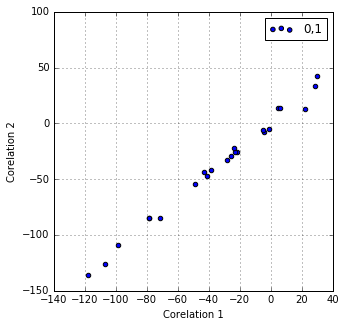

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(chb01_21_seisure_df.iloc[1].values, chb01_21_seisure_df.iloc[2].values, label='0,1')

plt.xlabel('Corelation 1'); plt.ylabel('Corelation 2')
plt.legend(loc='best')
plt.grid()
plt.show()


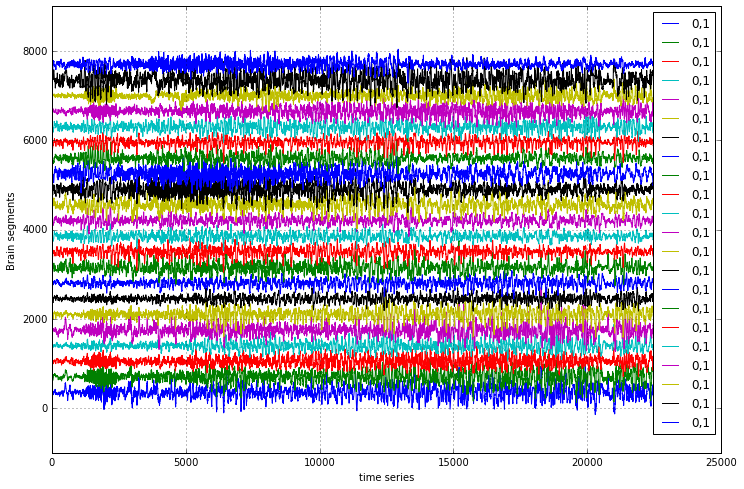

In [59]:
plt.figure(figsize=(12,8))
ts = np.arange(0, chb01_21_seisure_df.shape[0], 1)
max_pred = chb01_21_seisure_df.shape[1] -1
sep = 0
for i in (range(0, max_pred)):
    sep += 350
    cleaned_sep = chb01_21_seisure_df.ix[:, i].values + sep
    plt.plot(ts, cleaned_sep, label='0,1')
plt.xlabel('time series'); plt.ylabel('Brain segments')
plt.legend(loc='best')
plt.grid()
plt.show()

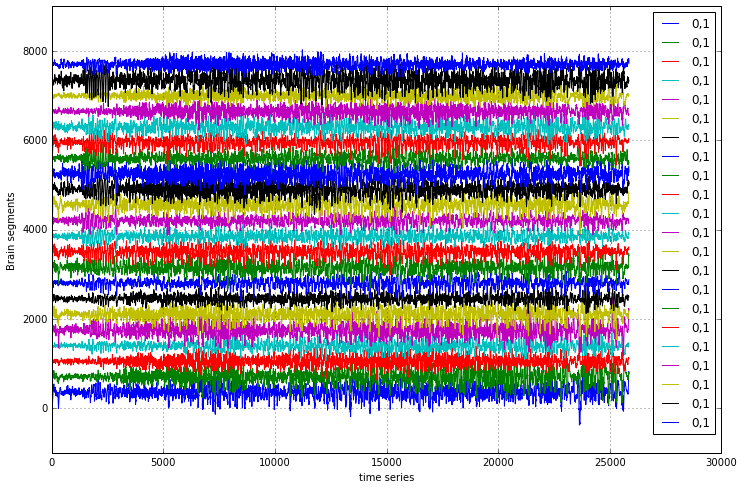

In [60]:
plt.figure(figsize=(12,8))
ts = np.arange(0, chb01_26_seisure_df.shape[0], 1)
max_pred = chb01_26_seisure_df.shape[1] -1
sep = 0
for i in (range(0, max_pred)):
    sep += 350
    cleaned_sep = chb01_26_seisure_df.ix[:, i].values + sep
    plt.plot(ts, cleaned_sep, label='0,1')
plt.xlabel('time series'); plt.ylabel('Brain segments')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
ax = ['ax'+str(i) for i in range(23)]
C = df_signals.columns
plt.figure(figsize=(10,10))
plt.suptitle("Fig1: 40 seconds of normal activity recorded by 23 channels", fontsize= 14)
for i in range(23): 
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[0:10240],"blue")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0) 
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=10, rotation=0)
    ax[i].yaxis.set_label_position("right")

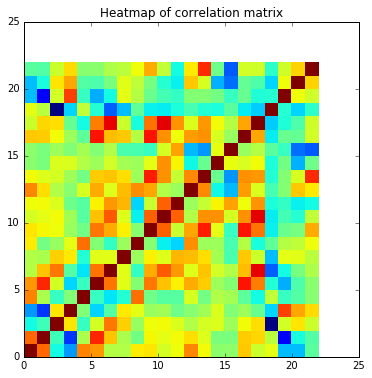

In [9]:
data = np.loadtxt('chb01_21_seisure.csv', delimiter=',', skiprows=1)

# Split predictors and response
x = data[:, :-1]
y = data[:, -1]

# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(x.T)

# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

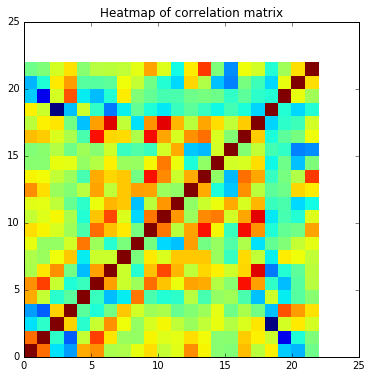

In [10]:
data = np.loadtxt('chb01_26_seisure.csv', delimiter=',', skiprows=1)

# Split predictors and response
x = data[:, :-1]
y = data[:, -1]

# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(x.T)

# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

## What is next?

Here are the next steps of the project:

1. Build training, validation and testing sets: randomly select recordings from the same patient that includes periods of sleep, of seizures and normal activities done during the day. 

2. Feature Engineering: Transform the signals from the different channels using Power Spectrum or Discrete Wavelet Transform. Compute variables like Entropy, rolling standard deviation, Hurst componenents...  

3. Model selection: find the classification algorithm best suited for our problem.

4. Results: After performing some cross validation, test our model on new data.




## References

1. *First seizure deﬁnitions and worldwide incidence and mortality* W. Allen Hauser and Ettore Beghi (Epilepsia, 2008 )

2. *Epilepsy Across the Spectrum:  Promoting Health and Understanding* (The National Academies Press)

3. *Cohort profile: 1958 British birth cohort - National Child Development Study* (International Journal of Epidemiology, 2006)

4. *Signal Classiﬁcation by Power Spectral Density: From Euclid to Riemann* (K.M.Wong, 2011)

5. *EEG Signal Classification Using Power Spectral Features and linear Discriminant Analysis: A Brain Computer Interface Application* Jaime F. Delgado Saa and Miguel Sotaquirá Gutierrez (2010)

6. *Application of Machine Learning To Epileptic Seizure Detection* Ali Shoeb and John Guttag (MIT, 2010)

7. *Application of machine learning to epileptic seizure onset detection and treatment* Ali Shoeb (MIT PhD thesis)

8. *Analysis of EEG records in an epileptic patient using wavelet transform* Hojjat Adeli, Ziqin Zhou, Nahid Dadmehr (Journal of Neuroscience Methods, 2003)



